### Student Information
Name: 黃晨溦 Chen-Wei Huang

Student ID: 112024803

GitHub ID: huang-chen-wei

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [5]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chenw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. The Data and Data Preparation
The dataset consists of Reddit posts and comments related to stock discussions, collected from communities such as wallstreetbets, StockMarket, and stockstobuytoday. Each record includes metadata (author, datetime, upvotes), textual content (title, body, entities), and sentiment scores (subjectivity, polarity, sentiment label). The dataset is particularly useful for studying retail investor behavior, market sentiment analysis, etc.

In [6]:
from pathlib import Path

p = Path("newdataset\Reddit-stock-sentiment.csv")
df = pd.read_csv(p, low_memory=False)
# 1. Quick preview
print(df.shape) # (number of data, number of variables/fetures)
df[0:4]

(847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0


The reddit data has 16 variables with following meanings:

| Column               | Description                                                                    | Type        | 
| -------------------- | ------------------------------------------------------------------------------ | -----       | 
| **type** (V)         | Whether the entry is a Reddit *post* or *comment*.                             | categorical | 
| **datetime**         | Timestamp of when the post/comment was created.                                | interval    | 
| **post_id**          | Unique Reddit ID for the post/comment.                                         | categorical | 
| **subreddit** (V)    | Source community (e.g., `wallstreetbets`, `StockMarket`).                      | categorical | 
| **title** (V)        | Title of the post (for `type=post`), or context.                               | text | 
| **author**           | Reddit username of the poster/commenter.                                       | categorical | 
| **url**              | Link to the post or external content (e.g., news, image, article).             | categorical | 
| **upvotes**          | Number of upvotes received.                                                    | ratio | 
| **downvotes**        | Number of downvotes received (NaN if unavailable).                             | ratio | 
| **upvote_ratio** (V) | Ratio of upvotes to total votes.                                               | ratio | 
| **text** (V)         | Main text body of the post or comment.                                         | text | 
| **subjectivity** (V) | A score (0–1) indicating subjectivity of text (0 = objective, 1 = subjective). | interval | 
| **polarity** (V)     | Sentiment polarity score (negative to positive, usually -1 to +1).             | interval | 
| **sentiment** (V)    | Simplified sentiment label (e.g., -1 = negative, 0 = neutral, 1 = positive).   | ordinal | 
| **entities** (V)     | Named entities extracted (companies, tickers, people, etc.).                   | categorical | 
| **label** (V)        | Final classification label (e.g., sentiment label used for ML).                | ordinal | 


In [3]:
# 1. Summary of numeric columns
print('===== Summary of important numeric columns =====')
print(df.describe()[['upvotes', 'downvotes', 'upvote_ratio', 'subjectivity', 'polarity']])

# 2. Count categorical variables
print('===== Counts of Posts vs Comments =====')
print(df['type'].value_counts())       # posts vs comments

print('===== Counts of subreddit =====')
print(df['subreddit'].value_counts())  # which subreddit the text is

print('===== Counts of sentiment =====')
print(df['sentiment'].value_counts().sort_index())

print('===== Counts of label =====')
print(df['label'].value_counts().sort_index())
#print(df.isna().sum()) # Missing data overview

===== Summary of important numeric columns =====
           upvotes  downvotes  upvote_ratio  subjectivity    polarity
count   847.000000  64.000000     64.000000    847.000000  847.000000
mean     12.262102   0.265625      0.981406      0.346768    0.036116
std     142.126337   1.461052      0.068147      0.317261    0.297814
min     -74.000000   0.000000      0.500000      0.000000   -1.000000
25%       1.000000   0.000000      1.000000      0.000000    0.000000
50%       1.000000   0.000000      1.000000      0.366667    0.000000
75%       4.000000   0.000000      1.000000      0.577500    0.150000
max    3943.000000  11.000000      1.000000      1.000000    1.000000
===== Counts of Posts vs Comments =====
type
comment    783
post        64
Name: count, dtype: int64
===== Counts of subreddit =====
subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64
===== Counts of sentiment =====
sentiment
-1.0    197
 0

####  >>> Exercise 1 (Overview of the main text data)

% Answer here

We can easily spot the possible difference in document length and the content between 'comment' and 'post'. Comments are shorter and do not carry lots of actual information.  Posts are relatively longer and informative.

In [4]:
for i in range(4):
    print(f"Example {i+1}")
    print("\n".join(df.text[i].split("\n")))

Example 1
Calls on retards
Example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Example 3
Seeing lots of red in the ticker.
Example 4
Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.

**Highlight Main Points**

* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.
* The feat highlights the power of electric boating and pushes the limits of innovation.
* Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.

**TLDR**

Hold onto your seats – Vision Marine Technologies Inc. and Shaun To

## 3. Data Transformation
The data is quite well-prepared. 
####  >>> **Exercise 2 & 3 (Querying techniques)**
For exercise 2, we use querying technique to select 12 feature that is important, and familiarize ourself with the data.

In [7]:
#Answer here
X = df.iloc[:, [0, 3, 4, *range(7, 16)]]

For exercise 3, try to fetch records belonging to the category of subereddit ```stockstobuytoday```, and query every 10th record. Only show the first 5 records.

In [6]:
X[X['subreddit']=='stockstobuytoday'][::10][0:5] 

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,stockstobuytoday,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
59,comment,stockstobuytoday,r/stockstobuytoday Lounge,1,NaN,NaN,heard chatter upto $350,0.000000,0.000000,0.0,"['heard', 'chatter']",0.0
112,comment,stockstobuytoday,Anyone been looking into OneMedNet?,0,NaN,NaN,"nice, good info, good post.",0.733333,0.666667,1.0,"['info', 'post']",1.0
158,post,stockstobuytoday,What will happen with 2022?,8,0.0,0.91,Investors brace for more volatility as the wes...,0.000000,0.000000,0.0,"['Russia', 'west', 'access', 'volatility', 'Sw...",0.0
186,comment,stockstobuytoday,$PPSI short squeeze 43% shorted,1,NaN,NaN,Date|Symbol|ShortVolume|ShortExemptVolume|Tota...,0.000000,0.000000,0.0,"['%', 'Q', 'N', 'Date|Symbol|ShortVolume|Short...",0.0


## 4. Data Mining using Pandas
### 4.1 Missing Values
#### >>> **Exercise 4 (Missing Values):** 
Calculating missing values by column and in every record instead of every column, respectively. Observe that missing values occurs in ```downvotes``` and ```upvote_ratio```, and that they are 783 numbers of data contains missing vlues

In [7]:
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,783,783,0,0,0,0,0,0


In [25]:
import helpers.data_mining_helpers as dmh

X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [9]:
X_missing = X.loc[X['downvotes'].isnull(), :]
print(X_missing['type'].value_counts())

type
comment    783
Name: count, dtype: int64


### 4.2 Duplicate Data
Check how many duplicates we have in our current dataset. We can see that we have 21 pairs of duplicated data. If we only focus on ```text``` we have 23 pairs of duplicated data. As we inspect further we see that some people might repost same content mupltiple times.

In [10]:
print(sum(X.duplicated()))
print(sum(X['text'].duplicated()))

21
23


In [11]:
X[X.duplicated('text')].loc[[595, 679], :]

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
595,post,stockstobuytoday,Crypto Gainers - Coinbase,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.0,0.0,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0
679,post,stockstobuytoday,Crypto Gainers - Coinbase,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.0,0.0,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0


## 5.  Data Preprocessing
### 5.1 Sampling

In [11]:
X_sample = X.sample(n=400, replace=False, random_state=97)
print(len(X_sample))
X_sample[0:4]

400


,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
803,comment,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,8,NaN,NaN,This term so far is even less politically stab...,0.440000,0.196667,1.0,"['lol', 'term']",-1.0
599,comment,stocks,US consumer sentiment plummets to second-lowes...,-2,NaN,NaN,"Yes, Trump and everyone who voted for him are ...",0.452381,0.027381,1.0,"['news', 'site', 'figure', 'Trump', 'sense', '...",0.0
814,comment,StockMarket,$ U.S. dollar value (crashing),10,NaN,NaN,He could just sleep through the presidency lik...,0.000000,0.300000,1.0,"['Biden', 'success', 'presidency']",-1.0
200,comment,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,1,NaN,NaN,I need people to understand this man is NOT st...,0.604242,-0.260227,-1.0,"['plan', 'goal', 'man', 'USD', 'US', 'economy'...",1.0


### >>> Exercise 6 (Difference between original data and sampled data):

% Answer here

1. Row count:
The original data has more rows (847 rows), while sample data will always have exactly number of data we assigned which is n = 400 rows.

2. Row order:
The original number index is preserved, but the order of rows in sample data is shuffled compare to the original. So you'll see that the index value is messy.

In [12]:
# Answer here
sum(X.duplicated())  # By default, it samples without replacement, so you won’t see duplicate rows in X_sample.
print(len(X_sample)) # Row count is different from X (Show the row count = 1000)
X_sample[0:3]        # Row order is different from X (Show the first three row)

400


,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
803,comment,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,8,NaN,NaN,This term so far is even less politically stab...,0.440000,0.196667,1.0,"['lol', 'term']",-1.0
599,comment,stocks,US consumer sentiment plummets to second-lowes...,-2,NaN,NaN,"Yes, Trump and everyone who voted for him are ...",0.452381,0.027381,1.0,"['news', 'site', 'figure', 'Trump', 'sense', '...",0.0
814,comment,StockMarket,$ U.S. dollar value (crashing),10,NaN,NaN,He could just sleep through the presidency lik...,0.000000,0.300000,1.0,"['Biden', 'success', 'presidency']",-1.0


### >>> Exercise 7 (Bar plot):

<Axes: title={'center': 'Category distribution'}, xlabel='label'>

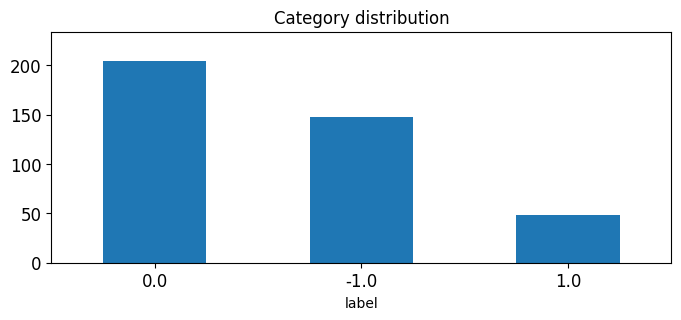

In [13]:
# Answer here
X_sample.label.value_counts().plot(kind = 'bar',
                                   title = 'Category distribution',
                                   ylim = [0, X_sample.label.value_counts().max()+30],        
                                   rot = 0, fontsize = 12, figsize = (8,3))

### >>> Exercise 8 (Bar plot between original and sampled data):


===== subreddit =====
                  Full Dataset  Sample
subreddit                             
StockMarket                250     117
stocks                     274     137
stockstobuytoday           174      87
wallstreetbets             149      59


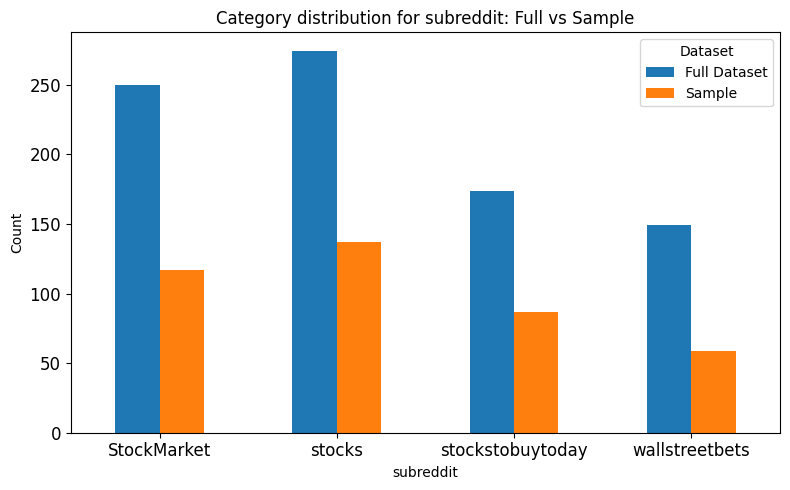


===== type =====
         Full Dataset  Sample
type                         
comment           783     371
post               64      29


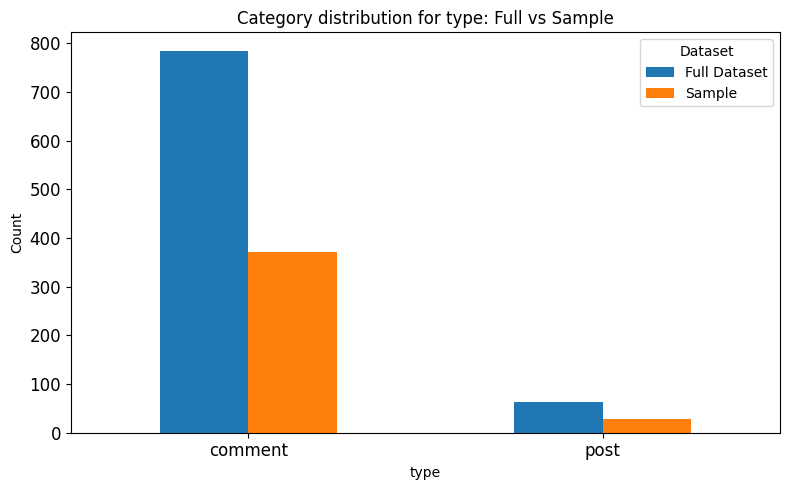


===== sentiment =====
           Full Dataset  Sample
sentiment                      
-1.0                197     104
 0.0                331     154
 1.0                319     142


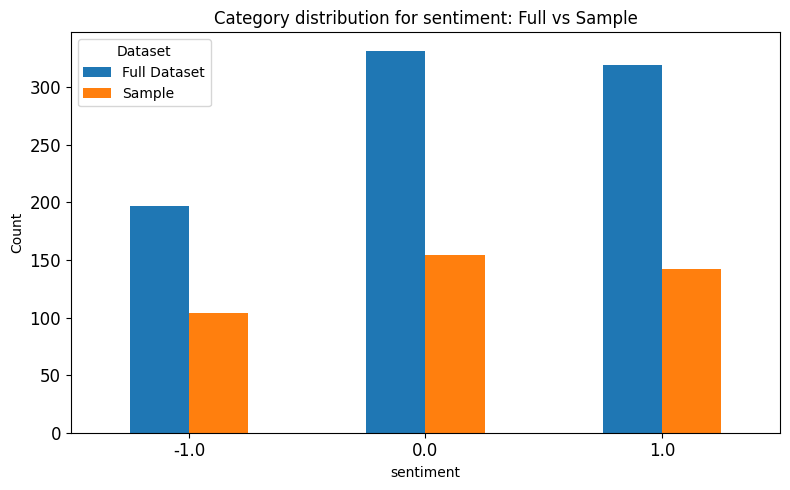


===== label =====
       Full Dataset  Sample
label                      
-1.0            315     148
 0.0            423     204
 1.0            109      48


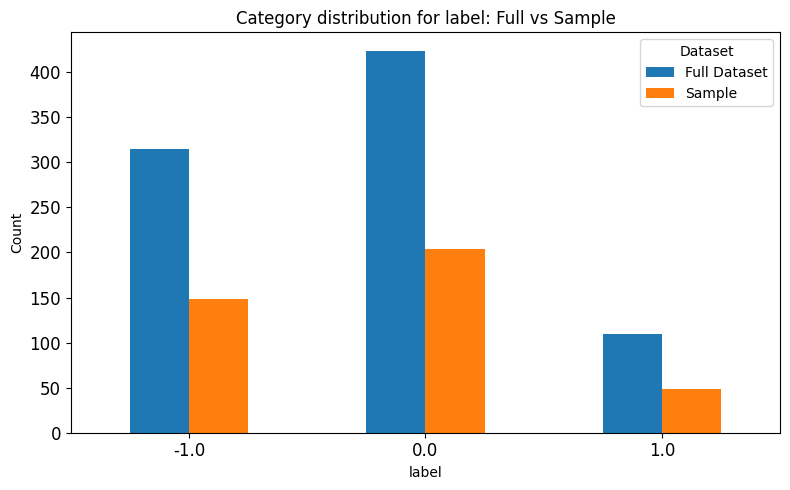

In [14]:
import matplotlib.pyplot as plt

# List of variables you want to compare
vars_to_plot = ["subreddit", "type", "sentiment", "label"]

for var in vars_to_plot:
    counts_full = X[var].value_counts().sort_index()
    counts_sample = X_sample[var].value_counts().sort_index()
    
    df_compare = pd.DataFrame({
        "Full Dataset": counts_full,
        "Sample": counts_sample
    }).fillna(0)   # fill missing categories with 0
    
    print(f"\n===== {var} =====")
    print(df_compare)
    
    # Plot grouped barplot
    ax = df_compare.plot(
        kind="bar",
        title=f'Category distribution for {var}: Full vs Sample',
        ylabel='Count',
        xlabel=var,
        rot=0,
        fontsize=12,
        figsize=(8, 5)
    )
    
    plt.legend(title="Dataset")
    plt.tight_layout()
    plt.show()

### 5.2 Feature Creation

In [16]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chenw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chenw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X["unigrams"]

C:\Users\chenw\AppData\Local\Temp\ipykernel_13572\193297623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


0                                   [Calls, on, retards]
1      [Stunt, as, in, like, why, did, they, even, ma...
2            [Seeing, lots, of, red, in, the, ticker, .]
3      [Vision, Marine, Technologies, Inc., is, rewri...
4                   [He, didn, ’, t, say, thank, you, .]
                             ...                        
842    [Invest, now, it, is, going, to, shoot, up, to...
843                       [Where, can, I, read, this, ?]
844    [Upgrades, ,, Downgrades, [, Stock, Analyst, R...
845    [i, sold, my, puts, so, i, expect, cheeto, to,...
846           [!, [, img, ], (, emote|t5_2th52|31224, )]
Name: unigrams, Length: 847, dtype: object

In [18]:
X[0:2]

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,unigrams
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]"
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma..."


In [19]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature subset selection
We are going to generate a document-term matrix from the original dataset.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [21]:
count_vect.get_feature_names_out()[692]

'calls'

In [22]:
count_vect.get_feature_names_out()[2706]

'on'

### **>>> Exercise 9 (Analyze the text data using build_analyzer()):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built.

In [53]:
# Answer here
analyze = count_vect.build_analyzer() # tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)
analyze(X.text[0])

['calls', 'on', 'retards']

Now let us look at the term-document matrix we built above, observe that we have 847 data and 4346 terms.

In [25]:
X_counts.shape

(847, 4346)

In [26]:
# we can obtain the feature names of the vectorizer, i.e., the terms usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [27]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (Querying nonzero entities in document-term matrix):**
Notice that there is a 3 in the above record. Provide code that can verify what word this 3 represents from the vocabulary. As we look in the first nonzero value above, we find out from our feature names that means the article has three `116` term

In [28]:
mask = X_counts[3].toarray() == 3 # find which columns in the document are nonzero
true_indices = np.flatnonzero(mask.ravel()) # ravel() helps flatten to 1D
count_vect.get_feature_names_out()[true_indices[0:1]] # The first nonzero column shown above

array(['116'], dtype=object)

Using first 20 features (terms) and first 20 documents only, we observe that the document-term matrix is very sparse.

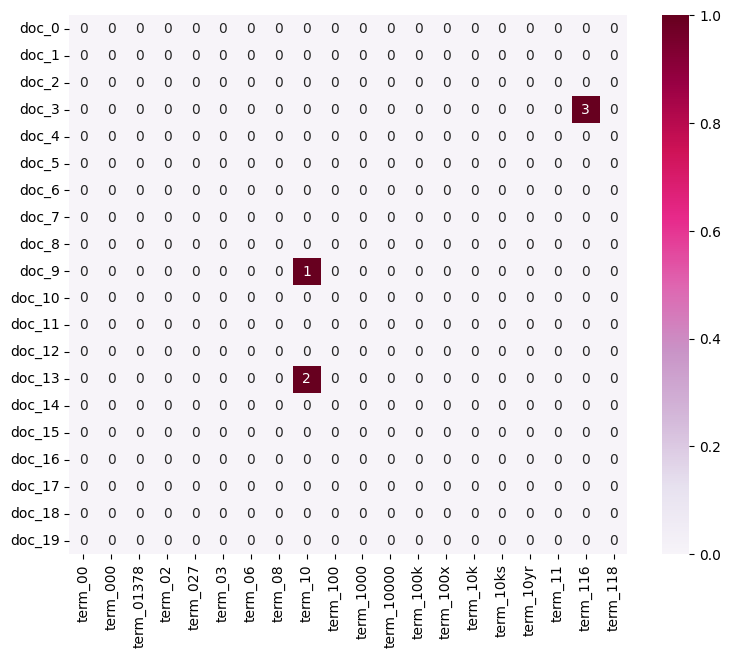

In [29]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]] # first twenty features only
plot_y = ["doc_"+str(i) for i in list(X.index)[0:20]] # obtain document index
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (Heatmap of document-term matrix):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only few terms with low **frequencies** in the subselection of the matrix. We can try to modify the code above to plot the entire term-document matrix or just a sample of it.

% Answer here

If no sampling while plotting term-document matrix, it'll take a lot time plotting a simple heatmap. 
So we need to think about how to sample informative data! The following is my way:
1. **Inspect terms frequency**: Calculate the term frequency over all documents
2. **Pick informative slices:** The idea is to select terms that is informative (not low frquencies) and with differnt term frequencies characteristics. Order from most to least and only show the first 30 records. 
4. **Sample documents:** Randomly choose 30 document indices
5. **Draw heatmap:** Draw heatmap between sample documents and informative word slices

By this we **extract wide range of terms with different frequecncy and observe the data structure**. Also it is informative that we can inspect the different behavior between very frequent and relative non-frequent word.

          term  count  index
the        the    920   3848
to          to    566   3911
and        and    488    327
is          is    402   2149
it          it    350   2161
of          of    311   2687
in          in    286   2024
that      that    238   3846
for        for    214   1604
this      this    213   3866
you        you    195   4333
on          on    171   2706
are        are    155    374
they      they    150   3858
be          be    134    486
he          he    132   1846
will      will    127   4255
with      with    126   4271
if          if    119   1987
as          as    115    388
market  market    111   2424
but        but    108    675
not        not    107   2659
so          so    103   3544
have      have     97   1842
all        all     97    289
us          us     96   4087
just      just     95   2197
was        was     94   4183
trump    trump     92   3977


<Axes: title={'center': 'Category distribution'}>

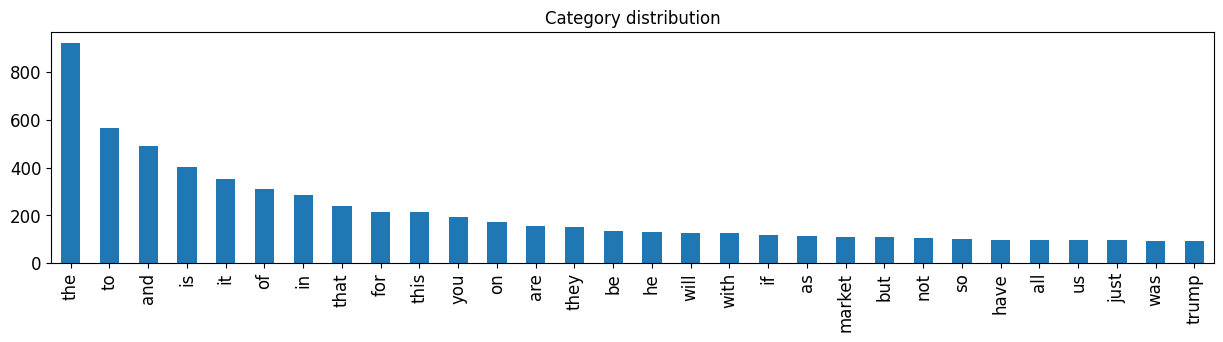

In [30]:
# n_docs = number of documents, n_terms = number of terms
n_docs, n_terms = X_counts.shape

# ---- 1. Inspect terms frequency ----
# Get the vocabulary
terms = count_vect.get_feature_names_out()
# Get the document frequency for each term (a term appears in how many docs)
term_frequencies_mine = np.asarray(X_counts.sum(axis=0)).ravel()  # shape: (n_terms,)
# Make a table that shows the word frequency
df_terms = pd.DataFrame({
    "term": terms,
    "count": term_frequencies_mine
})
df_terms['index'] = df_terms.index
df_terms.index = terms

# ---- 2. Pick informative slices ----
# Make a table that shows words from most to least frequent while query every 20th record and only show the first 30 records.
order = np.lexsort((np.arange(0,n_terms), term_frequencies_mine))[::-1]   # np.lexsort((a,b)): b 先排序，然後 a 按照 b 的順序排序後回傳索引值
df_terms_select = df_terms.iloc[order][0:30]
print(df_terms_select)
df_terms_select['count'].plot(kind = 'bar', title = 'Category distribution', fontsize = 12, figsize = (15,3)) # If want to see the bar plot

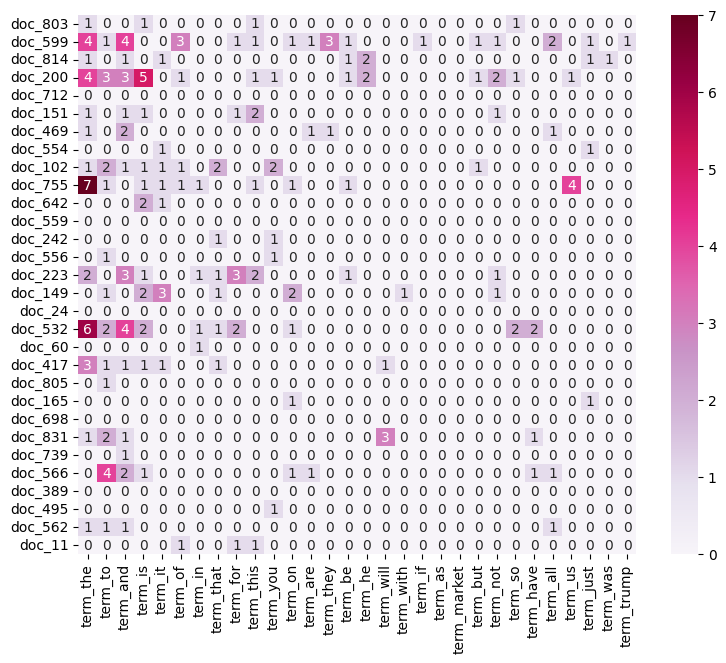

In [31]:
# ---- 3. Sample documents ----
X_sample_small = X.sample(n=30, replace=False, random_state=97)

# ---- 4. Draw heatmap ----
# Selected informative document-term matrix: X_count_select[100 random sampled documents x 100 mose frequent words
X_count_select = X_counts[X_sample_small.index][:,df_terms_select['index']].toarray()
plot_x = ["term_"+str(i) for i in df_terms_select['term']]
plot_y = ["doc_"+str(i) for i in list(X_sample_small.index)] # obtain document index
plot_z = X_count_select
df_draw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_draw,
                 cmap="PuRd",
                 vmin=0, vmax=7, annot=True)

From this we can see how sparse the matrix is. Even though in our process we actually record those word that does not only appear one time in the whole dataset (see the print of `df_terms_select`), but we can still see that these relative frequent word does not appear in many documents. There are many many parts in the matrix is 0. From this matrix we can also make a guess that many frequent word might not carry actual information of the document, like `the`, `to`, `amd` etc. We may need to deal with these uninformative words in later tasks.

### 5.4 Attribute Transformation / Aggregation
###  5.4.1 Transform Text Data
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words.

In [35]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [36]:
np.array_equal(term_frequencies_mine, term_frequencies) # The counting method of teacher and of mine gives same result 

True

C:\Users\chenw\AppData\Local\Temp\ipykernel_19320\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


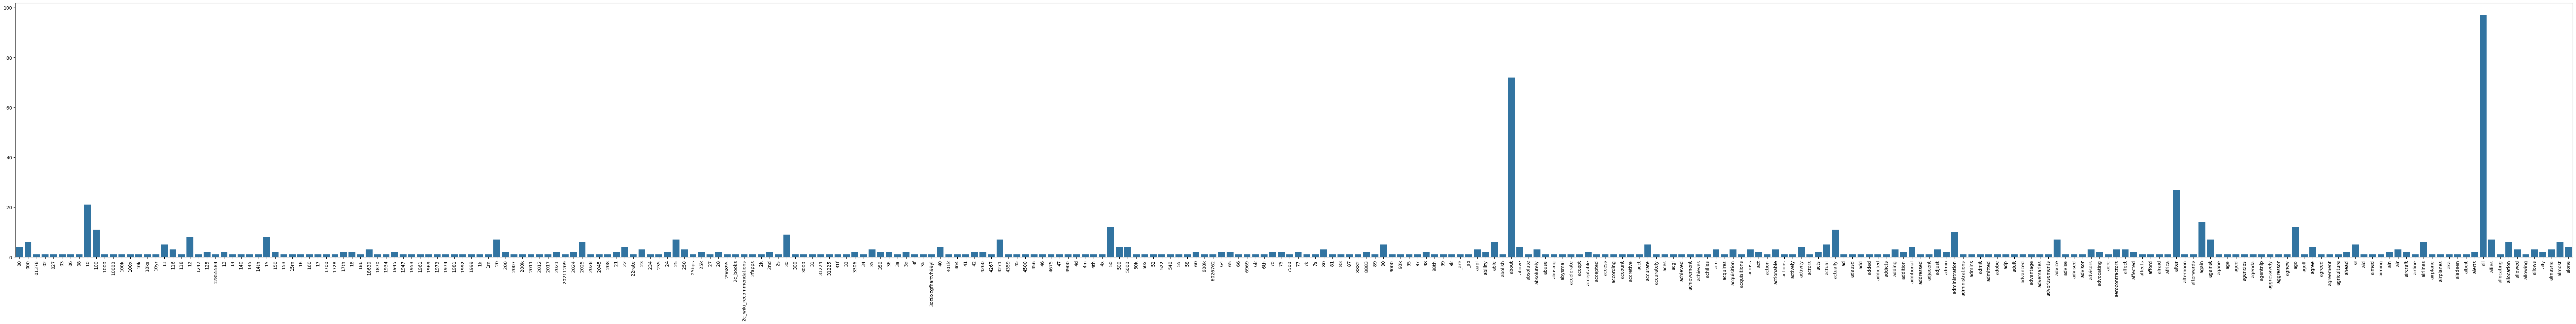

In [37]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12 (Interactive visualization using plotly):**

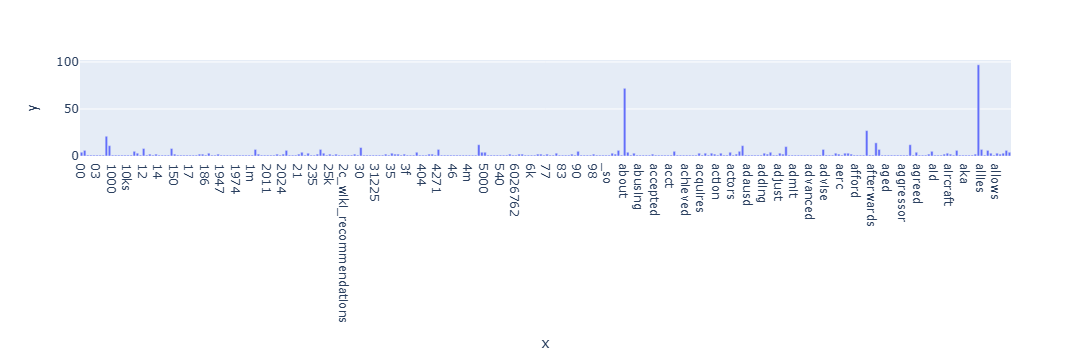

In [38]:
# Answer here
import plotly.express as px

fig = px.bar(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies[:300]
)
fig.show()

### >>> **Exercise 13 (Create meaningful visualization in term frequency distribution):** 
The chart above only contains 300 vocabulary in the documents, and it's messy. Efficiently reduce the number of terms you want to visualize.

% Answer here

First we observe the term frequencies from high to low (the below chart) to choose an appropriate thereshold on term frequencies. By observation, 50 might be a good thereshold that shows much data but not to much for the plot to be messy. So, here I only show the words when its frequencies are more then 50. `df_term` is the table that I created above which record term names and its corresponding count / frequencies

In [39]:
order = np.lexsort((np.arange(0,n_terms), term_frequencies_mine))[::-1]   # np.lexsort((a,b)): b 先排序，然後 a 按照 b 的順序排序後回傳索引值
df_terms_sort = df_terms.iloc[order]
df_terms_sort[:30]

,term,count,index
the,the,920,3848
to,to,566,3911
and,and,488,327
is,is,402,2149
it,it,350,2161
of,of,311,2687
in,in,286,2024
that,that,238,3846
for,for,214,1604
this,this,213,3866


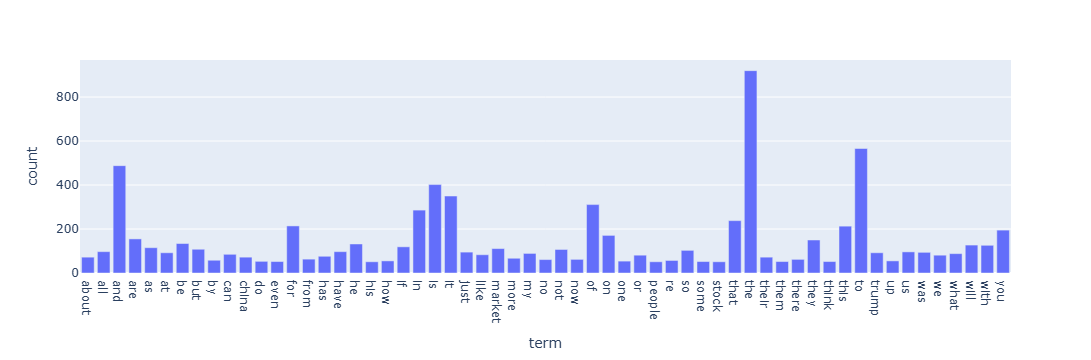

In [40]:
thereshold = df_terms['count'] > 50
fig = px.bar(
    data_frame=df_terms.loc[thereshold],
    x='term',
    y='count'
)
fig.show()

### >>> **Exercise 14 (Create meaningful visualization in term frequency distribution: sort by frequencies):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail).

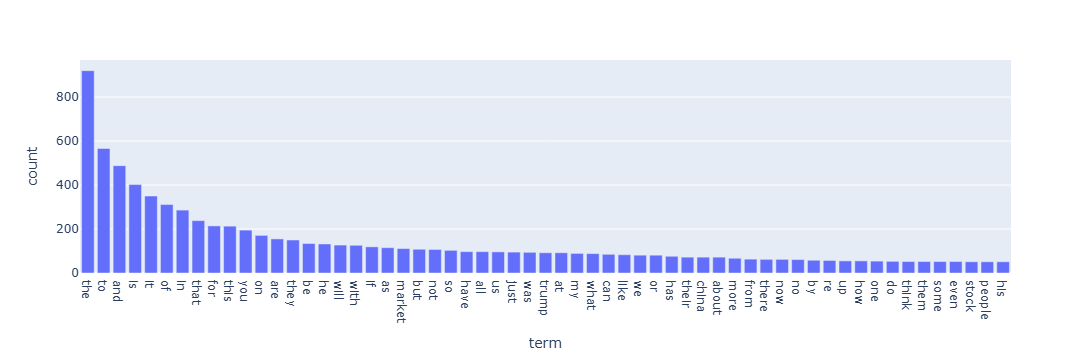

In [41]:
# Answer here
# order by frequencies
order = np.lexsort((np.arange(0,n_terms), term_frequencies_mine))[::-1]   # np.lexsort((a,b)): b 先排序，然後 a 按照 b 的順序排序後回傳索引值
df_terms_sort = df_terms.iloc[order]
thereshold = df_terms_sort['count'] > 50
fig = px.bar(
    data_frame=df_terms_sort.loc[thereshold],
    x='term',
    y='count'
)
fig.show()

### >>> **Exercise 15 (Apply Log transformation on frequency distribution):** 
Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format.

% Answer here
1. Order of terms
For large counts, log compresses the differences. (E.g. 920 vs 566 raw looks very far apart, but log(920) ≈ 6.824 vs log(566) ≈ 6.338 looks much closer.) This compression makes the large counts more comparable (closer) to small counts. (the difference is less dramatic)

2. Distribution shape
Raw frequencies usually follow very heavy-tailed distribution, but after transformation, the distribution is more concentrated. The slope and the tail is not that obvious compare to raw count. Common words (like stopwords that slipped through) won’t overshadow rare but meaningful terms as strongly.

3. Interpretation
Raw counts shows people the absolute magnitude, while log transformed count show people the relative imporatance by telling one about how many times of difference (difference in ratio) between two number. 

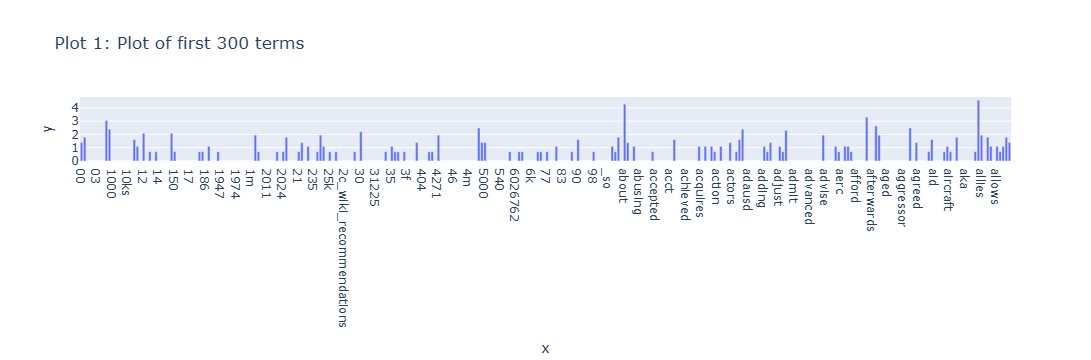

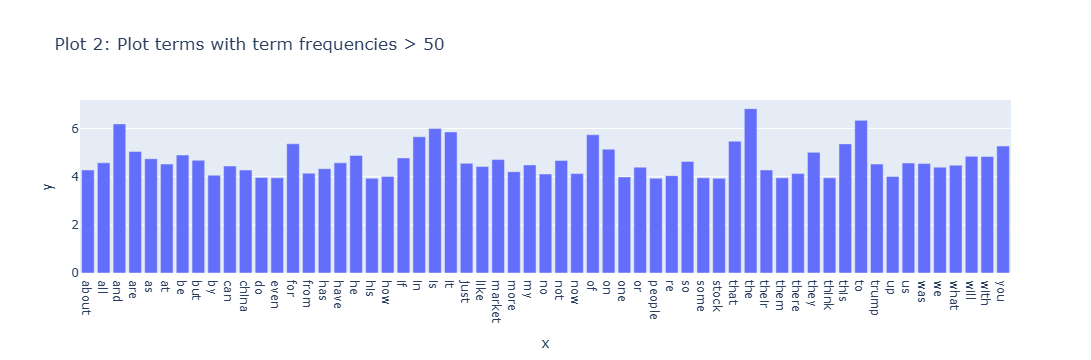

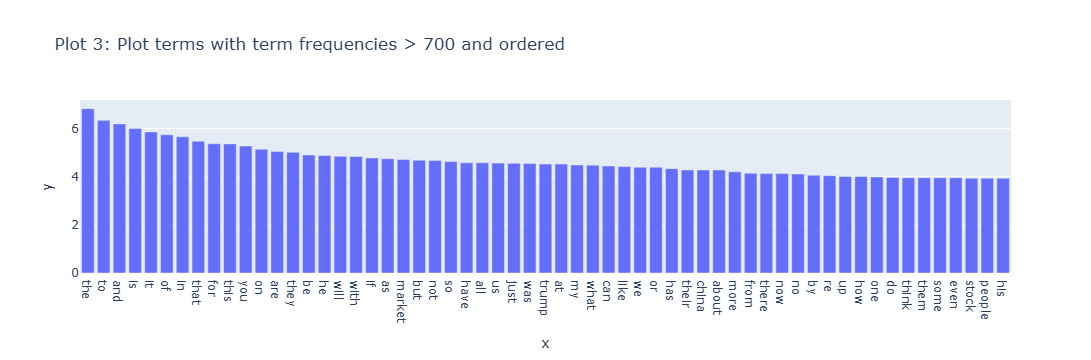

In [43]:
import math

term_frequencies_log = [math.log(i) for i in term_frequencies]

# Plot 1: Plot of first 300 terms
fig = px.bar(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies_log[:300],
    title="Plot 1: Plot of first 300 terms"
)
fig.show()

# Plot 2: Plot terms with term frequencies > 50
thereshold = np.array(term_frequencies_log).ravel() > math.log(50)
fig = px.bar(
    x=count_vect.get_feature_names_out()[thereshold],
    y=np.array(term_frequencies_log).ravel()[thereshold],
    title="Plot 2: Plot terms with term frequencies > 50"
)
fig.show()

# Plot 3: Plot terms with term frequencies > 50 and ordered
order = np.lexsort((np.arange(0,n_terms), term_frequencies_log))[::-1]   # np.lexsort((a,b)): b 先排序，然後 a 按照 b 的順序排序後回傳索引值
thereshold = np.array(term_frequencies_log).ravel()[order] > math.log(50)
fig = px.bar(
    x=count_vect.get_feature_names_out()[order][thereshold],
    y=np.array(term_frequencies_log).ravel()[order][thereshold],
    title="Plot 3: Plot terms with term frequencies > 700 and ordered"
)
fig.show()

## New visualizations
### 1. Word Cloud

% Answer here

Word cloud show the most frequent terms (or tokens) in posts/comments, the more the word appears, the bigger the word is. We separated by subreddit or by label of sentiment (positive / neutral / negative). Use libraries like wordcloud in Python. We may exclude stopwords (but we do not do this here).

From the word cloud of label for different sentiment class we observe that:

    1. For sentiment class = negative: We see "Trump", "China", "tariff". This is quite meaningful since the stock plunge in recent year is related to changing policy related to arising tariff.

    2. For sentiment class = positive: We see adjective "good" and "technology", this aligns to our knowledge that in recent year, technology sector contributes to most of raising in stock market.


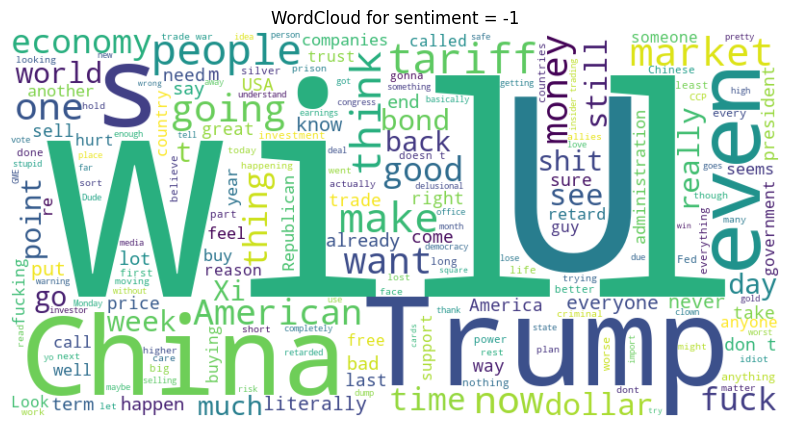

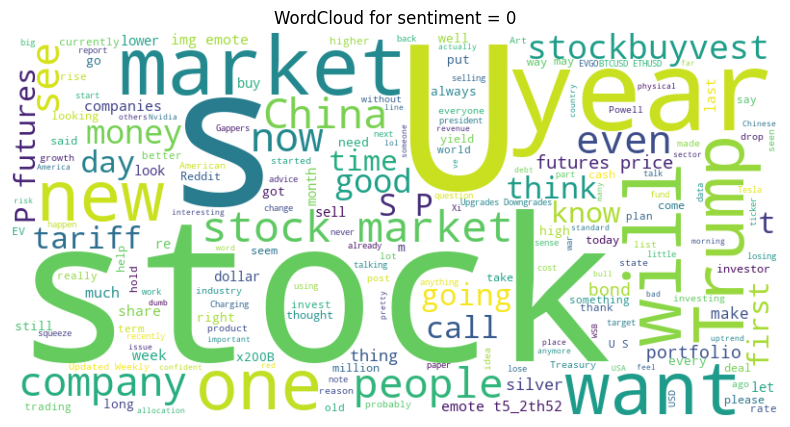

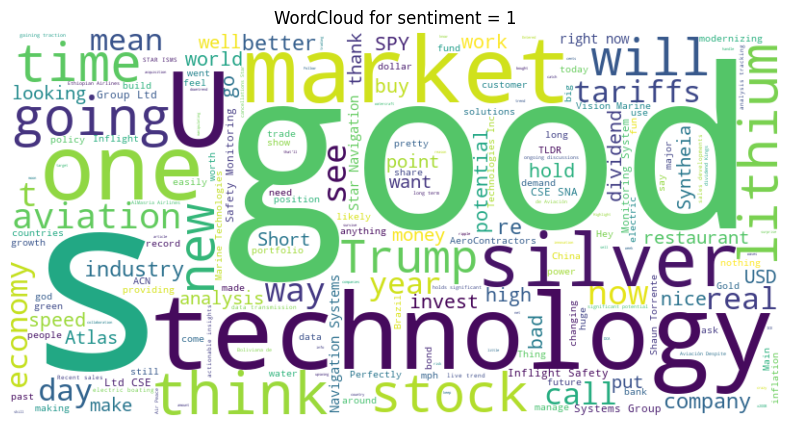

In [20]:
# %pip install wordcloud
from wordcloud import WordCloud

for sentiment_class in [-1, 0, 1]:
    texts = X.loc[X['label'] == sentiment_class, 'text']
    all_text = " ".join(texts.dropna().tolist())
    wc = WordCloud(width=800, height=400,
                   background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for sentiment = {sentiment_class}")
    plt.show()

### 2. Top 60 terms by sentiment label (variable "label")

% Answer here

For each document with certain label of sentiment class, we would mark each word in this post/comment to such label of sentiment class, so when we count terms frequencies while preserving the information of what kind of sentiment class does the document source of this terms comes. An therefore, by plot term frequencies while showing its label of sentiments, we can see the possible relation of certain word to certain positive / neutral / negative perspective.

Notice that most of the frequent word are not informative such as 'the', 'to', 'and', so we should not interpret its sentiment. But, for some proper nouns, it may be meaningful to look over its sentiment, such as 'Trump' and 'China', we can see how these two words having different distibution over label of sentiments compare to other words near them with similar term frequencies.

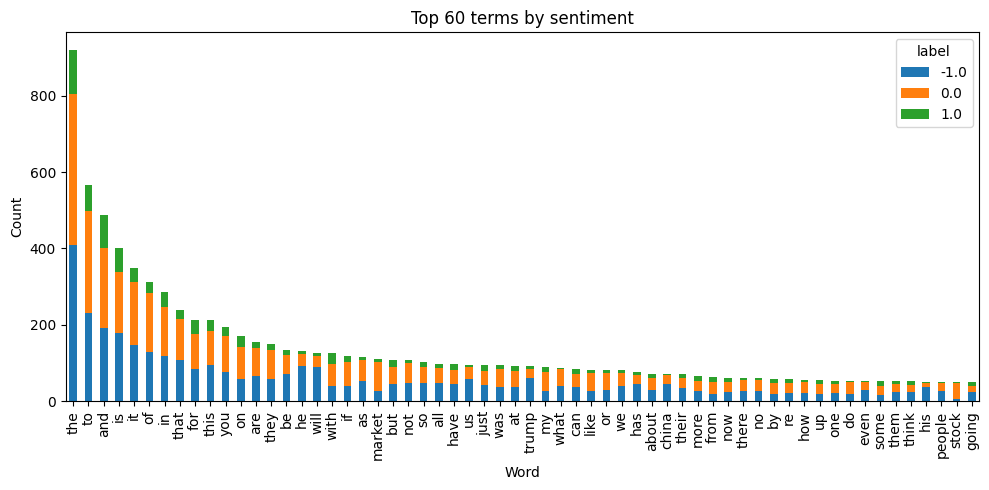

In [57]:
# Top 60 terms by sentiment
# Create clean tokens column
X = X.copy()  # avoid SettingWithCopyWarning
X['unigrams_clean'] = X['text'].fillna('').apply(analyze)
# My term-frequency-by-sentiment plot (unchanged)
df_tokens = X[['label','unigrams_clean']].explode('unigrams_clean').dropna()
counts = df_tokens.groupby(['unigrams_clean','label']).size().unstack(fill_value=0)
topN = counts.sum(axis=1).nlargest(60).index
counts.loc[topN].plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Top 60 terms by sentiment")
plt.xlabel("Word")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Phase 2

In [58]:
### Begin Assignment Here